# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Solomon Stevens
### [GitHub Repository](https://github.com/Stone-Snevets/web-06-web_scraping)

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

### Question 1:
Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [56]:
# Imports
from bs4 import BeautifulSoup
from collections import Counter
from spacytextblob.spacytextblob import SpacyTextBlob
import matplotlib.pyplot as plt
import pickle, requests, spacy

In [7]:
# Grab the html from the link
article_html = requests.get('https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/')

# Dump the html text into a file
#-> Using pickle (.pkl) file
with open('html_article.pkl', 'wb') as file:
    pickle.dump(article_html.text, file)

### Question 2:
Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [8]:
# Grab the document
with open('html_article.pkl', 'rb') as file:
    pkl_html_article = pickle.load(file)

# Use BeautifulSoup to attain the article and a parser
soup_output = BeautifulSoup(pkl_html_article, 'html.parser')

# Print the text
print(soup_output.get_text())

















How Laser Headlights Work | Hackaday






































































Skip to content






Hackaday


Primary Menu

Home
Blog
Hackaday.io
Tindie
Hackaday Prize
Submit
About


Search for:



 March 27, 2021 






How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype 

### Question 3:
Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent `tokens` (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [4]:
# Load a spacy core
nlp = spacy.load('en_core_web_sm')

# Add a spacyTextBlob pipeline
nlp.add_pipe('spacytextblob')

# Create an NLP doc containing our html
doc = nlp(soup_output.get_text())

In [34]:
# Create an empty list for our words
token_list = []

# For each token in our doc
for token in doc:
    
    # Check if the token is a stop word or a punctuation
    if not(token.is_stop or token.is_punct or token.is_space):
        
        # Append the token onto our word list
        #-> Make sure the token is lowercase
        token_list.append(token.lower_)

# Count the frequency of each token
tkn_freq = Counter(map(str, token_list))

# Print the 5 most frequent tokens
print(tkn_freq.most_common(5))

[('comment', 136), ('march', 133), ('2021', 133), ('says', 132), ('report', 130)]


### Question 4:
Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent `lemmas` (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [26]:
# Create an empty lemma list
lemma_list = []

# For each token
for token in doc:
    
    # Check if the token is a stop word or a punctuation
    if not(token.is_stop or token.is_punct or token.is_space):

        # Append the token's lemma to the list
        #-> make sure each lemma is lowercase
        lemma_list.append(token.lemma_.lower())

# Count the frequency of each lemma
lemma_freq = Counter(map(str, lemma_list))

# Print the 5 most frequent lemmas
print(lemma_freq.most_common(5))

[('comment', 156), ('say', 134), ('march', 133), ('2021', 133), ('report', 130)]


### Question 5:
Define the following methods:
* `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
* `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [53]:
# Define score_by_token function
def score_sentence_by_token(sentence, interesting_token):

    # Initialize counters to zero
    appearance:int = 0
    num_words_in_sentence:int = 0

    # For each token
    for token in sentence:
        
        # Determine if the token is a word
        if not(token.is_space or token.is_punct):
            
            # If yes, determine if the token is interesting
            if not(token.is_stop):

                # Determine if the token is in the list of interesting tokens
                if token.lower_ in interesting_token:

                    # If yes, increment 'appearance'
                    appearance += 1

            # Increment 'num_words_in_sentence'
            num_words_in_sentence += 1

    # Return 'appearance' / 'num_words_in_sentence'
    #-> Use float division for better precision
    return float(appearance)/num_words_in_sentence

In [51]:
# Define score_by_lemmas function
def score_sentence_by_lemmas(sentence, interesting_lemmas):

    # Initialize counters to zero
    appearance:int = 0
    num_words_in_sentence:int = 0

    # For each token
    for token in sentence:
        
        # Determine if the token is a word
        if not(token.is_space or token.is_punct):
            
            # If yes, determine if the token is interesting
            if not(token.is_stop):

                # Determine if the token's lemma is in the list of interesting lemmas
                if token.lemma_.lower() in interesting_lemmas:

                    # If yes, increment 'appearance'
                    appearance += 1

            # Increment 'num_words_in_sentence'
            num_words_in_sentence += 1

    # Return 'appearance' / 'num_words_in_sentence'
    #-> Use float division for better precision
    return float(appearance)/num_words_in_sentence

In [55]:
# Grab the first sentence of our article
first_sentence = list(doc.sents)[0]


# Grab only the words from our token frequency results
#-> Create an empty list
interesting_tokens = []

#-> Move all the tokens into the list
for token_word, token_count in tkn_freq.most_common(5):
    interesting_tokens.append(token_word)


# Grab only the words from our lemmas frequency results
#-> Create an empty list
interesting_lemmas = []

#-> Move all the tokens into the list
for lemma_word, lemma_count in lemma_freq.most_common(5):
    interesting_lemmas.append(lemma_word)


# Call the functions
#-> score_sentence_by_token
token_score = score_sentence_by_token(first_sentence, interesting_tokens)

#-> score_sentence_by_lemmas
lemmas_score = score_sentence_by_lemmas(first_sentence, interesting_lemmas)


# Display the scores
print('Token Score:', token_score)
print('Lemma Score:', lemmas_score)

Token Score: 0.08
Lemma Score: 0.08


In [58]:
print(len(list(doc.sents)))

452


### Question 6:
Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

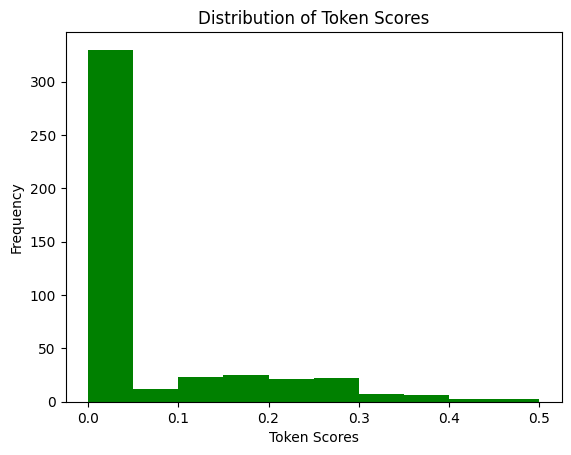

In [67]:
# Create an empty list to put token scores in
token_score_list = []

# For each sentence
for i in range(len(list(doc.sents))):

    # Call score_sentence_by_token()
    tkn_score = score_sentence_by_token(list(doc.sents)[i], interesting_tokens)

    # Append the token score into our list
    token_score_list.append(tkn_score)

# Generate a histogram of the scores

#-> Generate the actual histogram
plt.hist(x = token_score_list, bins = 10, color='green')

#-> Add labels
plt.xlabel('Token Scores')
plt.ylabel('Frequency')
plt.title('Distribution of Token Scores')

#-> Display the histogram
plt.show()

# Comment what seems to be the most common range of scores
# -> By FAR the most common range of scores is between 0.00 and 0.05.
# -> This is mostly due to many of the token scores being zero.

### Question 7:
Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

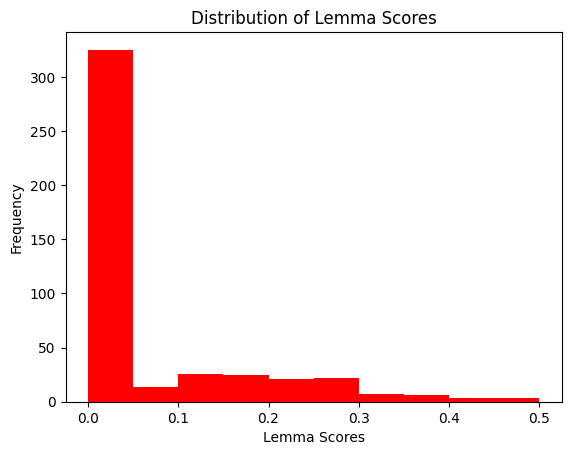

In [66]:
# Create an empty list to put lemmas scores in
lemma_score_list = []

# For each sentence
for i in range(len(list(doc.sents))):

    # Call score_sentence_by_token()
    lma_score = score_sentence_by_lemmas(list(doc.sents)[i], interesting_lemmas)

    # Append the token score into our list
    lemma_score_list.append(lma_score)

# Generate a histogram of the scores

#-> Generate the actual histogram
plt.hist(x = lemma_score_list, bins = 10, color='red')

#-> Add labels
plt.xlabel('Lemma Scores')
plt.ylabel('Frequency')
plt.title('Distribution of Lemma Scores')

#-> Display the histogram
plt.show()

# Comment what seems to be the most common range of scores
#-> Similarly to the token scores, most of the lemma scores are near zero.
#-> This is again probably because most of the lemma scores ARE zero.

### Question 8:
Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).